In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras 
from keras.layers import Activation,Convolution2D,MaxPooling2D,UpSampling2D,Dense,Flatten,Reshape,UpSampling2D,ZeroPadding2D
from keras.models import Sequential
import cv2
import pandas as pd
import os

In [65]:
images=os.listdir('../cat-dog-images')
images=np.array(images)
#np.random.shuffle(images)
data=[]
for ix in range(10000):
    img=cv2.imread('../cat-dog-images/'+images[ix])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(64,64))
    data.append(img)
data=np.array(data)

In [66]:
y=[]
for ix in data:
    img=ix
    #print img.shape
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    y.append(img)
y=np.array(y)    
        

In [67]:
y=np.reshape(y,(10000,64,64,1))

In [68]:
y_train=y[:8500]/255.0
X_train=data[:8500]/255.0
X_test=data[8500:]/255.0
y_test=y[8500:]/255.0

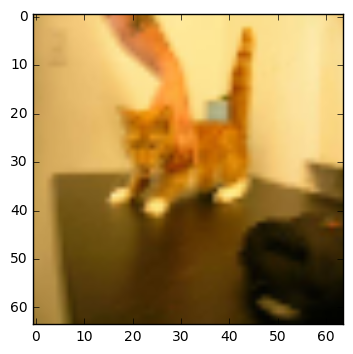

In [69]:
plt.imshow(data[0])

In [70]:
model=Sequential()
model.add(Convolution2D(64,3,3,input_shape=(64,64,1),activation='relu'))
model.add(Convolution2D(128,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,5,5,activation='relu'))
model.add(Convolution2D(16,3,3,activation='relu'))


model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_17 (Convolution2D) (None, 62, 62, 64)    640         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
convolution2d_18 (Convolution2D) (None, 60, 60, 128)   73856       convolution2d_17[0][0]           
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 30, 30, 128)   0           convolution2d_18[0][0]           
____________________________________________________________________________________________________
convolution2d_19 (Convolution2D) (None, 26, 26, 32)    102432      maxpooling2d_3[0][0]             
___________________________________________________________________________________________

In [71]:
model.fit(y_train,X_train,batch_size=100,nb_epoch=5,shuffle=True,validation_data=(y_test,X_test))

Train on 8500 samples, validate on 1500 samples
Epoch 1/5
8500/8500 [==============================] - 1744s - loss: 0.1167 - acc: 0.4630 - val_loss: 0.0452 - val_acc: 0.5721
Epoch 2/5
8500/8500 [==============================] - 1710s - loss: 0.0281 - acc: 0.6322 - val_loss: 0.0196 - val_acc: 0.6680
Epoch 3/5
8500/8500 [==============================] - 1711s - loss: 0.0184 - acc: 0.6753 - val_loss: 0.0170 - val_acc: 0.6702
Epoch 4/5
8500/8500 [==============================] - 1721s - loss: 0.0162 - acc: 0.6771 - val_loss: 0.0154 - val_acc: 0.6740
Epoch 5/5
8500/8500 [==============================] - 1712s - loss: 0.0149 - acc: 0.6743 - val_loss: 0.0150 - val_acc: 0.6447


In [72]:
out=model.predict(y_train[:10])
print out[0].shape

(64, 64, 3)


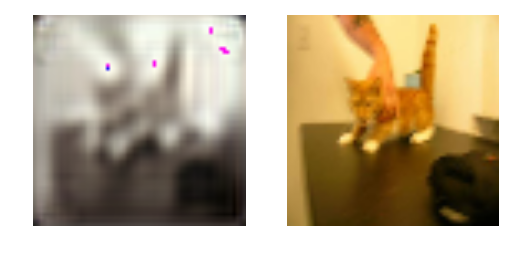

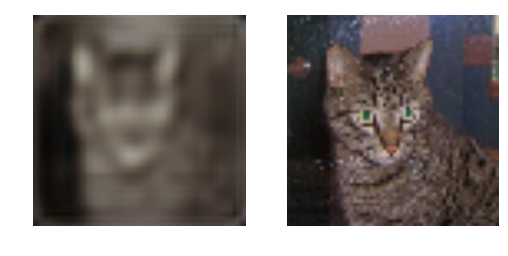

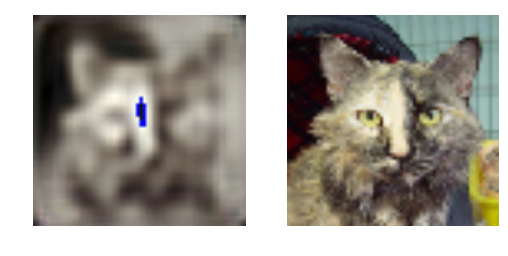

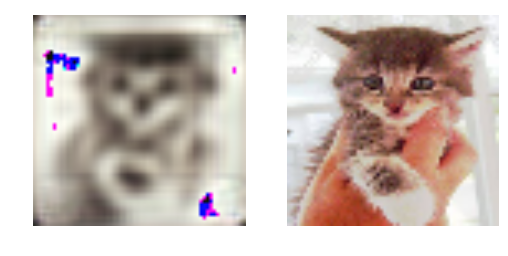

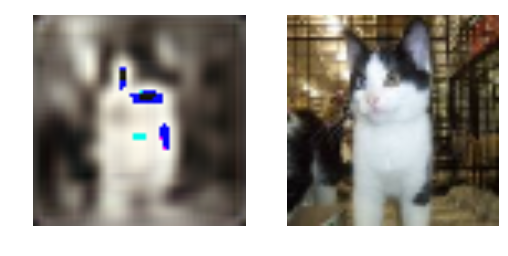

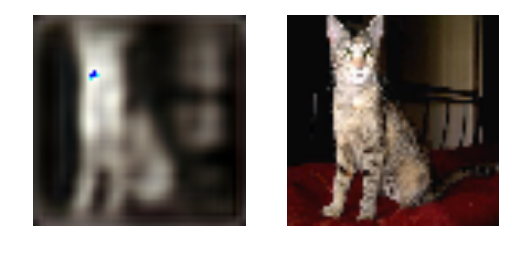

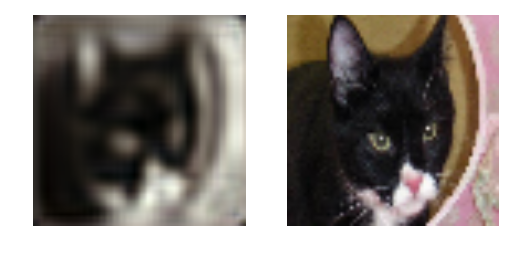

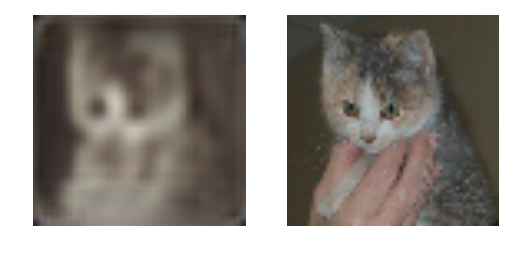

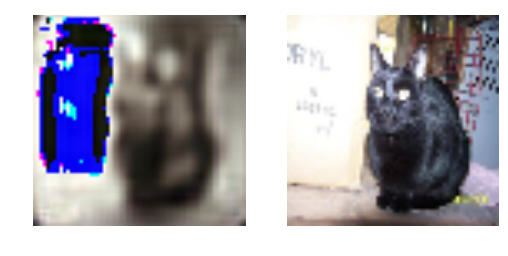

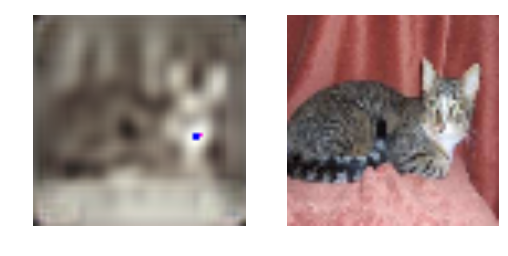

In [75]:
for ix in range(10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(out[ix])
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(X_train[ix])
    plt.axis('off')
plt.show()


In [76]:
from keras.models import load_model
model.save('my_model.h5')

In [77]:
model.save_weights('my_model_weights.h5')